In [1]:
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from numpy import random

class naivebayes():
    
    def fit(self, X, y):
        self.n_samples, self.n_features = X.shape
        self.n_classes = len (np.unique (y))
        self.mean = np.zeros ((self.n_classes, self.n_features))
        self.variance = np.zeros ((self.n_classes, self.n_features))
        self.prior = np.zeros (self.n_classes)
        
        for c in range (self.n_classes):
            X_c = X[y == c]
            self.mean [c, :] = np.mean(X_c, axis =0)
            self.variance [c, :] = np. var(X_c, axis =0)
            self.prior[c] = X_c.shape[0] / self.n_samples
            
    def predict (self, X):
        y_hat = [self.get_class_probability(x) for x in X]
        return np.array(y_hat)
        
    
    def  get_class_probability (self, x):
        posteriors = list()
        
        for c in range (self.n_classes):
            mean = self. mean [c]
            variance = self.variance [c]
            prior = np.log(self.prior [c])
            
            posterior = np.sum(np.log(self.gaussian_density(x, mean, variance)))
            
            posterior = prior + posterior
            
            posteriors.append(posterior)

        return np.argmax (posteriors)
            
    
    def gaussian_density (self, x, mean, variance):
        constant = 1/np.sqrt(2* np.pi * variance)
        probability = constant * np. exp(-0.5 * ((x - mean ) ** 2)/ variance)
        return probability
    

In [2]:
iris = load_iris()
random.seed(42)

### 1
## 'setosa', 'versicolor'

In [3]:
X, y = iris.data, iris.target
X,y = X[y != 2] , y[y!=2]

indices= np.arange(X.shape[0])
np.random.shuffle(indices)

X = X[indices]
y = y[indices]
# print(indices)
k = 5
nb = naivebayes()
p = len (X)// k
accuracies = np.zeros(k)

slice(0,len(X),p)

mean_fpr = []
mean_tpr = []

for m in range (k):
    start_index = m*p+1
    end_index = m*p + p
    
    X_test = np.concatenate ([X[start_index:end_index]])
    y_test = np.concatenate ([y[start_index:end_index]])
    X_train = np.concatenate([X[:start_index],X[end_index:]])
    y_train = np.concatenate([y[:start_index],y[end_index:]])
    
    
    
    nb = naivebayes()
    nb.fit(X_train, y_train)
    prediction = nb.predict(X_test)
    
    
    
    accuracy = (y_test == prediction).mean()
    accuracies[m] = accuracy
    print(f"accuracy of fold {m} is {accuracy}") 
    print("y_test",y_test )
    print("prediction", prediction)
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
    roc_auc = metrics.auc(fpr, tpr)
    print("fpr",fpr, "\ntpr", tpr)
    cm = confusion_matrix(y_test,prediction)
    print("cm", cm)
    mean_fpr.append(fpr)
    mean_tpr.append(tpr)
    
#     display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
#     display.plot()
#     plt.plot ([0,1], [0,1], linestyle ='dashed')
#     plt.show()

accuracy of fold 0 is 1.0
y_test [1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]
prediction [1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]
fpr [0. 0. 1.] 
tpr [0. 1. 1.]
cm [[12  0]
 [ 0  7]]
accuracy of fold 1 is 1.0
y_test [1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0]
prediction [1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0]
fpr [0. 0. 1.] 
tpr [0. 1. 1.]
cm [[11  0]
 [ 0  8]]
accuracy of fold 2 is 1.0
y_test [0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1]
prediction [0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1]
fpr [0. 0. 1.] 
tpr [0. 1. 1.]
cm [[13  0]
 [ 0  6]]
accuracy of fold 3 is 1.0
y_test [1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1]
prediction [1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1]
fpr [0. 0. 1.] 
tpr [0. 1. 1.]
cm [[ 5  0]
 [ 0 14]]
accuracy of fold 4 is 1.0
y_test [1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1]
prediction [1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1]
fpr [0. 0. 1.] 
tpr [0. 1. 1.]
cm [[ 8  0]
 [ 0 11]]


In [4]:
mean2_fpr = np.sort(np.concatenate(mean_fpr))
mean2_tpr= np.sort(np.concatenate(mean_tpr))
print("fpr",mean2_fpr, "\ntpr", mean2_tpr)

fpr [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.] 
tpr [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


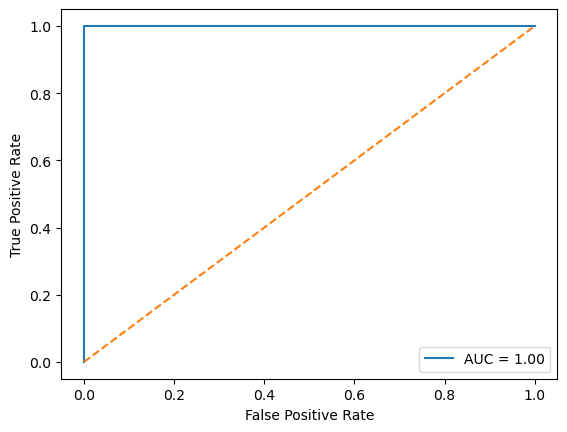

In [5]:
new_roc_auc = metrics.auc(mean2_fpr, mean2_tpr)
display = metrics.RocCurveDisplay(fpr=mean2_fpr, tpr=mean2_tpr, roc_auc=new_roc_auc)
display.plot()
plt.plot ([0,1], [0,1], linestyle ='dashed')
plt.show()

### 2

## 'versicolor' 'Virginica'

In [6]:
X, y = iris.data, iris.target

In [7]:
X.shape

(150, 4)

In [8]:


X,y = X[y != 0] , y[y!=0]

indices= np.arange(X.shape[0])

np.random.shuffle(indices)

X = X[indices]
y = y[indices]

y[y==1] =0

y[y==2] =1

mean_fpr = []
mean_tpr = []


k = 5
nb = naivebayes()
p = len (X)// k
accuracies = np.zeros(k)

slice(0,len(X),p)

for m in range (k):
    start_index = m*p+1
    end_index = m*p + p
    
    X_test = np.concatenate ([X[start_index:end_index]])
    y_test = np.concatenate ([y[start_index:end_index]])
    X_train = np.concatenate([X[:start_index],X[end_index:]])
    y_train = np.concatenate([y[:start_index],y[end_index:]])
    
#     print("y_train",y_train)
    nb = naivebayes()
    nb.fit(X_train, y_train)
    prediction = nb.predict(X_test)
    
    accuracy = (y_test == prediction).mean()
    accuracies[m] = accuracy
#     print(f"accuracy of fold {m} is {accuracy}")
    
    print("y_test\t\t\t",y_test )
    print("prediction\t\t", prediction)
    
    cm = confusion_matrix(y_test,prediction)
    print("cm \t\t\t", cm)
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
#     print("fpr", fpr, "\ntpr",tpr,"\nthresholds",thresholds)

    roc_auc = metrics.auc(fpr, tpr)
#     print("roc_auc",roc_auc)
    
    mean_fpr.append(fpr)
    mean_tpr.append(tpr)

    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
#     display.plot()
#     plt.plot ([0,1], [0,1], linestyle ='dashed')
#     plt.show()

y_test			 [0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0]
prediction		 [0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0]
cm 			 [[8 1]
 [1 9]]
y_test			 [1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0]
prediction		 [1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0]
cm 			 [[ 5  0]
 [ 1 13]]
y_test			 [0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0]
prediction		 [0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0]
cm 			 [[11  0]
 [ 1  7]]
y_test			 [1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1]
prediction		 [1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1]
cm 			 [[10  1]
 [ 1  7]]
y_test			 [0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1]
prediction		 [0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1]
cm 			 [[11  2]
 [ 0  6]]


In [9]:
print(np.average(accuracies))

0.9157894736842105


In [10]:
mean2_fpr = np.ceil(np.sort(np.concatenate(mean_fpr)))
mean2_tpr= np.ceil(np.sort(np.concatenate(mean_tpr)))
print(f"fpr {np.ceil(mean2_fpr)} , \ntpr {np.around(mean2_tpr, decimals=2)}")

fpr [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.] , 
tpr [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


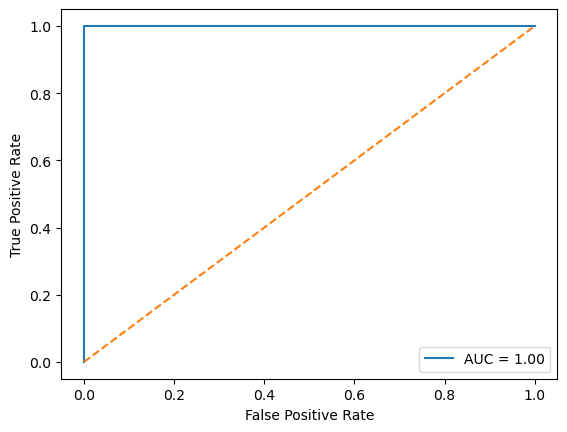

In [11]:
new_roc_auc = metrics.auc(mean2_fpr, mean2_tpr)
display = metrics.RocCurveDisplay(fpr=mean2_fpr, tpr=mean2_tpr, roc_auc=new_roc_auc)
display.plot()
plt.plot ([0,1], [0,1], linestyle ='dashed')
plt.show()

### 3

## 'setosa', 'virginica'

In [12]:
X, y = iris.data, iris.target
X,y = X[y != 1] , y[y!=1]
# print("y.shape", y.shape)

indices= np.arange(X.shape[0])
# print(indices)
np.random.shuffle(indices)

X = X[indices]
y = y[indices]
# print("y", y)

y[y==2] =1
# print("new y", y)

mean_fpr = []
mean_tpr = []


k = 5
nb = naivebayes()
p = len (X)// k
accuracies = np.zeros(k)

slice(0,len(X),p)

for m in range (k):
    start_index = m*p+1
    end_index = m*p + p
    
    X_test = np.concatenate ([X[start_index:end_index]])
    y_test = np.concatenate ([y[start_index:end_index]])
    X_train = np.concatenate([X[:start_index],X[end_index:]])
    y_train = np.concatenate([y[:start_index],y[end_index:]])
    
#     print("y_train",y_train)
    nb = naivebayes()
    nb.fit(X_train, y_train)
    prediction = nb.predict(X_test)
    
    
    
    accuracy = (y_test == prediction).mean()
    accuracies[m] = accuracy
    print(f"accuracy of fold {m} is {accuracy}")
    
    
    
    print("y_test",y_test )
    print("prediction", prediction)
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
    roc_auc = metrics.auc(fpr, tpr)
    print("fpr",fpr, "\ntpr", tpr)
    
    cm = confusion_matrix(y_test,prediction)
    print("cm", cm)
    mean_fpr.append(fpr)
    mean_tpr.append(tpr)
    
#     display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
#     display.plot()
#     plt.plot ([0,1], [0,1], linestyle ='dashed')
#     plt.show()

accuracy of fold 0 is 1.0
y_test [0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1]
prediction [0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1]
fpr [0. 0. 1.] 
tpr [0. 1. 1.]
cm [[13  0]
 [ 0  6]]
accuracy of fold 1 is 1.0
y_test [1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0]
prediction [1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0]
fpr [0. 0. 1.] 
tpr [0. 1. 1.]
cm [[ 6  0]
 [ 0 13]]
accuracy of fold 2 is 1.0
y_test [0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1]
prediction [0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1]
fpr [0. 0. 1.] 
tpr [0. 1. 1.]
cm [[13  0]
 [ 0  6]]
accuracy of fold 3 is 1.0
y_test [0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0]
prediction [0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0]
fpr [0. 0. 1.] 
tpr [0. 1. 1.]
cm [[ 9  0]
 [ 0 10]]
accuracy of fold 4 is 1.0
y_test [1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1]
prediction [1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1]
fpr [0. 0. 1.] 
tpr [0. 1. 1.]
cm [[ 8  0]
 [ 0 11]]


In [13]:
mean2_fpr = np.sort(np.concatenate(mean_fpr))
mean2_tpr= np.sort(np.concatenate(mean_tpr))
print("fpr",mean2_fpr, "\ntpr", mean2_tpr)

fpr [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.] 
tpr [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


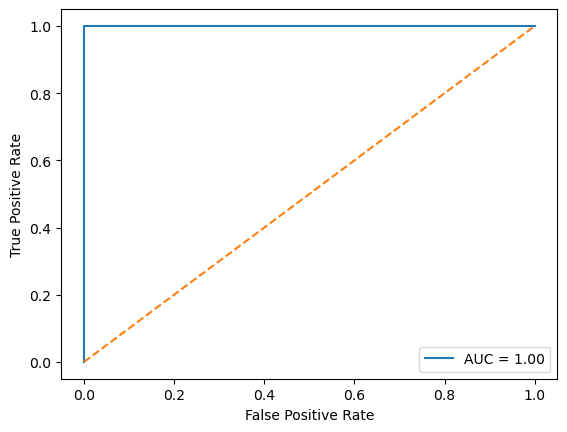

In [14]:
new_roc_auc = metrics.auc(mean2_fpr, mean2_tpr)
display = metrics.RocCurveDisplay(fpr=mean2_fpr, tpr=mean2_tpr, roc_auc=new_roc_auc)
display.plot()
plt.plot ([0,1], [0,1], linestyle ='dashed')
plt.show()